In [3]:
import pandas as pd
import numpy as np

In [40]:
import os
from subprocess import check_output
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
data = pd.read_csv("trainset.csv")

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Stock Close price')

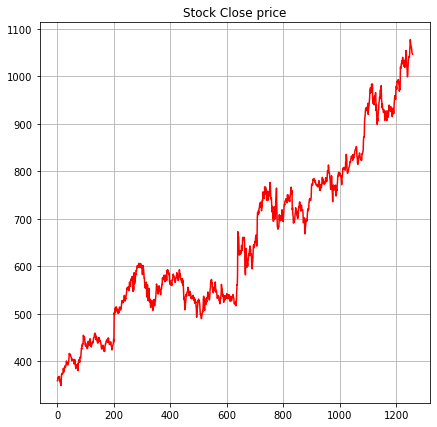

In [12]:
plt.figure(figsize = (7,7))
plt.grid(True)
plt.plot(data["Close"],color = 'red')
plt.title("Stock Close price")

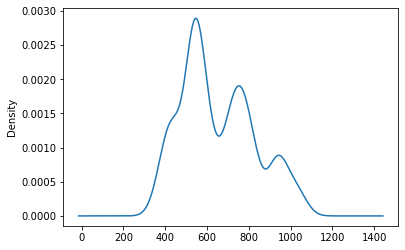

In [15]:
data["Close"].plot(kind = "kde")

In [ ]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize = (12,7))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.grid()
    
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    

Testing the stationarity of timeseries using Rolling statistics first

In [30]:
close = data["Close"]

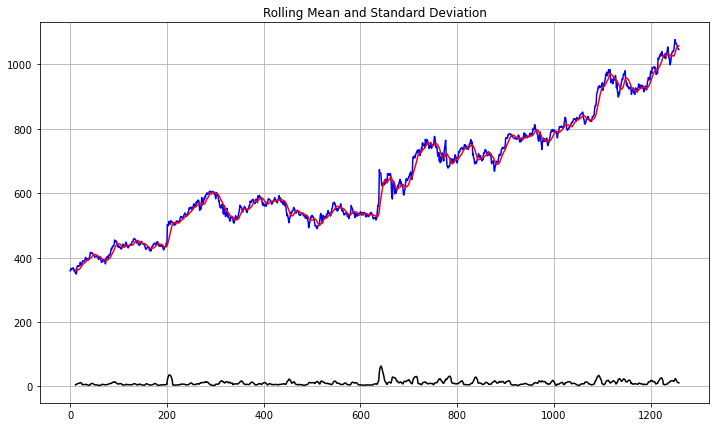

In [31]:
test_stationarity(close)

Now using ADF test for th same

In [34]:
adft = adfuller(close,autolag='AIC')

adft

(-0.25061013161969903,
 0.9322139741822821,
 0,
 1258,
 {'1%': -3.4355588184378574,
  '5%': -2.8638402312881497,
  '10%': -2.5679946684494275},
 8879.839371026796)

In [37]:
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values


In [38]:
output

Test Statistics                  -0.250610
p-value                           0.932214
No. of lags used                  0.000000
Number of observations used    1258.000000
critical value (1%)              -3.435559
critical value (5%)              -2.863840
critical value (10%)             -2.567995
dtype: float64

In [43]:
result = seasonal_decompose(close, model='multiplicative', period = 30)

<Figure size 432x288 with 0 Axes>

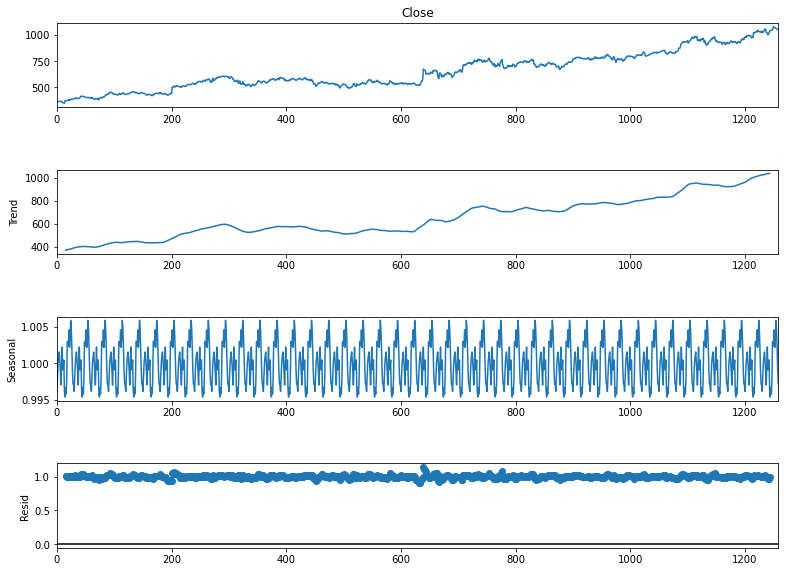

In [47]:
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(12, 9)